# Módulo 2 do Trabalho Prático

Neste trabalho, a DCT (direta e inversa) deve ser desenvolvida utilizando as equações estudadas em sala de aula, sem o uso de bibliotecas prontas para este fim. 

1 Dado um sinal de áudio s com N amostras, desenvolva uma aplicação para:

 a) Exibir a DCT de s e o valor do nível DC;

b) Encontrar uma aproximação ? de s obtida preservando os n (parâmetro inteiro no intervalo [0, N-1]) coeficientes AC (da DCT) mais importantes de s e zerando os demais coeficientes AC. Para audição, o sinal resultante deve ser multiplicado por uma constante c tal que (volume de ?) = (volume de s)

2 Dada uma imagem I de dimensões RxC, desenvolva uma aplicação para:

a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

3 Desenvolva um compactador/expansor de frequências para sinais de áudio, em que Xt[round(k*c)] = X[k], c real, c > 0. A dimensão do vetor Xt deve ser igual à do vetor X.


In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import scipy.io.wavfile
from scipy import fftpack
import pydub
from pydub.playback import play
import math

# Calcula DCT 1D

In [3]:
def dct1D(vector):
    N = len(vector)
    X = np.zeros(N)
    Ak = math.sqrt(2.0/N)
    for k in range(N):
        print(k + 1, " | ", N ," " * 10, end="\r")
        
        if k == 0:
            Ck = math.sqrt(1/2)
        else:
            Ck = 1
            
        somatorio = 0
        for n in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            somatorio += vector[n] * math.cos((q/twoN) + (w/twoN))
            
            #sum += vector[n] * math.cos(((2*math.pi*k*n)/2*N)+((k*math.pi)/2*N))
        X[k] = Ak * Ck * somatorio

    return X

# Calcula IDCT

In [4]:
def idct1D(X):

    N = len(X)
    x = np.zeros(N)

    Ak = math.sqrt(2.0/N)
    
    for n in range(N):
        print(n + 1 , " | ", N, " " * 10, end="\r")
        somatorio = 0
        for k in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            if k == 0:
                Ck = math.sqrt(1.0/2.0)
            else:
                Ck = 1.0
            
            somatorio += Ck * X[k] * math.cos((q/twoN)+(w/twoN))
            
            
        x[n] = Ak * somatorio

    return x

In [5]:
# Calcula DCT 2D

In [6]:
def dct2d(imagem):
    # Criando A imagem no dominio da frequencia
    ImagemDCT = np.zeros(imagem.shape)

    # Aplicando DCT Verticalmente nas linhas
    for i, linha in enumerate(imagem):
        ImagemDCT[i] = dct1D(linha)

    ImagemDCT_Trans = ImagemDCT.T

    # Aplicando DCT Verticalmente nas Colunas
    for i, linha in enumerate(ImagemDCT_Trans):
        ImagemDCT_Trans[i] = dct1D(linha)

    
    # Necessario retornar a transposta
    return ImagemDCT_Trans.T

In [7]:
# Calcula IDCT 2d

In [8]:
def idct2d(imagem):
    # Aplicando IDCT Verticalmente nas linhas
    imagemIDCT = np.zeros(imagem.shape)
    for i, linha in enumerate(imagem):
        #print(i)
        imagemIDCT[i] = idct1D(linha)
        #imagemIDCT[i] = fftpack.idct(linha)

    imagemIDCT_Trans = imagemIDCT.T

    # Aplicando DCT Verticalmente nas Colunas
    for i, linha in enumerate(imagemIDCT_Trans):
        #print(i)
        imagemIDCT_Trans[i] = idct1D(linha)
        #imagemIDCT_Trans[i] = fftpack.idct(linha)

    return imagemIDCT_Trans.T

# Compactador/Expansor

In [9]:
def Compactador(X,c):
    K = len(X)
    for i in range(K):
        #Se a posição nao existir 
        if(round(i*c) >= K): # multiplica pela constante c
            X[i] = 0.0;
        else:
            X[i] = X[round(i*c)];
            
    return X

# Função para plotagem do gráfico com a DCT Filtrada

In [34]:
def plotaDCTs(dct1, dct2):

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(dct1, linewidth=0.1, alpha=1.0, color='blue')
  
    ax2.plot(dct2, linewidth=0.1, alpha=1.0, color='blue')
    plt.show()

In [11]:
def desenhaGrafico(nomeArquivo, data):
    plt.figure(nomeArquivo, figsize=(20,6))
    plt.title(nomeArquivo)
    plt.plot(data, linewidth=0.1, alpha=1, color='red')
    plt.ylabel('Amplitude')
    plt.xlabel('Dados')
    plt.show()

# Testes com DCT e IDCT

In [12]:
x_slide = []

X_slide = [10, 5, 8.5, 2, 1, 1.5, 0, 0.1]

x_slide = idct1D(X_slide)
x_slide_pack = fftpack.idct(X_slide, norm='ortho')

In [13]:
print("M: ", x_slide)
print("C: ", x_slide_pack)
print(x_slide == x_slide_pack)

M:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
C:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
[False False False False  True False False False]


In [18]:
X_DCT = dct1D(x_slide)
X_DCT

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.44328993e-15,  1.00000000e-01])

In [19]:
X_DCT_pack = fftpack.dct(x_slide, norm="ortho")
X_DCT_pack

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.77635684e-15,  1.00000000e-01])

In [20]:
X_DCT == X_DCT_pack

array([False, False,  True, False, False, False, False, False])

# DCTAudio

/home/lucasnn/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


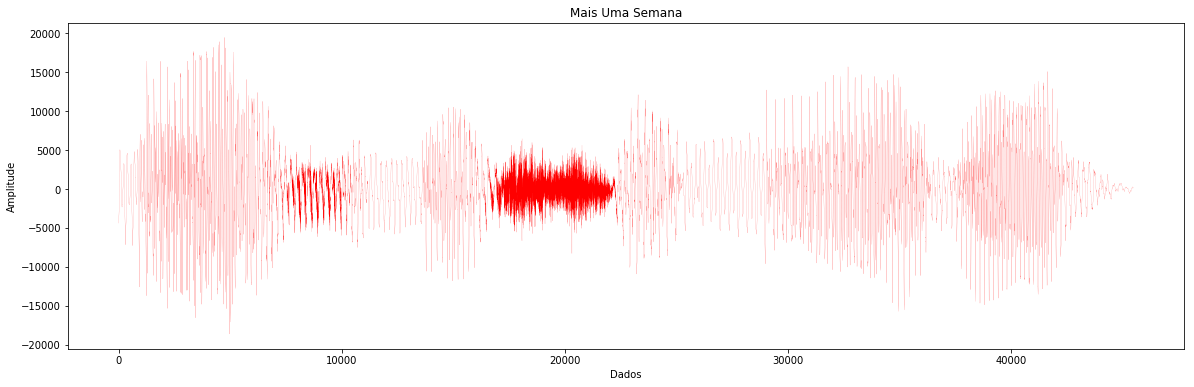

In [21]:
rate, audioData = scipy.io.wavfile.read("MaisUmaSemana.wav")
desenhaGrafico("Mais Uma Semana", audioData)

In [22]:
len(audioData)

45498

In [23]:
prompt = "Digite o tamanho de dados a ser tratado: MAX=" + str(len(audioData)) + " :" 
length = int(input(prompt))
if(length > len(audioData)):
    print("Valor entrado é maior")
    length = len(audioData)
print(length)

Digite o tamanho de dados a ser tratado: MAX=45498 :1000
1000


In [24]:
len(audioData)
len(audioData[:length])

1000

In [26]:
DCT = dct1D(audioData[:length])

#DCT = fftpack.dct(audioData, norm = 'ortho') #Calcula a Transformada Discreta

In [27]:
#print (DCT)
dctFiltrada = DCT.copy()
# print (dctFiltrada)

In [28]:
listaComDCT = dctFiltrada.tolist() #Cria uma lista com os valores resultantes da Transformada Discreta
#print(listaComDCT)
Indices = []

#Percorre todo o array e troca os valores pelo seu módulo
for i in range(0, len(listaComDCT)):
    listaComDCT[i] = abs(listaComDCT[i])
    aux = listaComDCT.copy()

#print(listaComDCT)

In [29]:
numero_de_frequencias_desejadas = int(input("Digite o numero de frequencias desejadas: "))

Digite o numero de frequencias desejadas: 10


In [30]:
#Adiciona na lista os n índices de maior valor, com n = numero de amostras
for i in range(0,numero_de_frequencias_desejadas):
    Indices.append(listaComDCT.index(max(aux)))
    indiceAux = aux.index(max(aux))
    aux.pop(indiceAux)

    # dctFiltrada = DCT.copy()

print(Indices)

[13, 7, 20, 5, 22, 24, 21, 11, 26, 23]


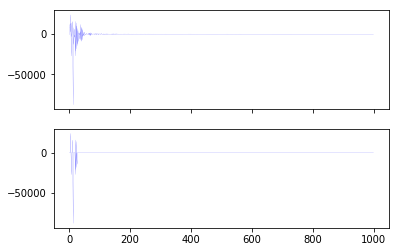

In [35]:
#Preserva os DCT's de tamanho igual aos da lista de IndiceMaximo verificando se eles estão na lista e zera os demais
for i in range(0, len(dctFiltrada)):
    if i not in Indices:
        dctFiltrada[i] = 0

dctFiltrada = np.asarray(dctFiltrada)

#AudioTransformado = fftpack.idct(DCT, norm = 'ortho')
AudioTransformado = idct1D(DCT)
AudioTransformado = AudioTransformado.astype("int16")
scipy.io.wavfile.write("audioTransformado.wav", rate, AudioTransformado)

#AudioTransformadoImportantes = fftpack.idct(dctFiltrada, norm = 'ortho')
AudioTransformadoImportantes = idct1D(dctFiltrada)
AudioTransformadoImportantes = AudioTransformadoImportantes.astype("int16")
scipy.io.wavfile.write("AudioTransformadoImportantes.wav", rate, AudioTransformadoImportantes)

plotaDCTs(DCT, dctFiltrada)

In [36]:
len(DCT)

1000

In [37]:
dctCompactado = Compactador(DCT, 3)

AudioTransformadoCompactado = fftpack.idct(dctCompactado, norm = 'ortho')
#AudioTransformadoImportantes = idct1D(dctFiltrada)
AudioTransformadoCompactado = AudioTransformadoCompactado.astype("int16")
scipy.io.wavfile.write("AudioTransformadoCompactado.wav", rate, AudioTransformadoCompactado)

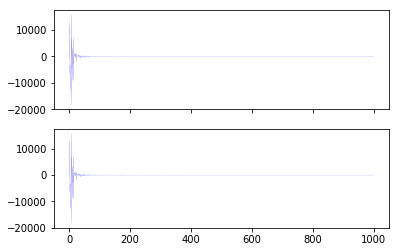

In [38]:
plotaDCTs(DCT, dctCompactado)

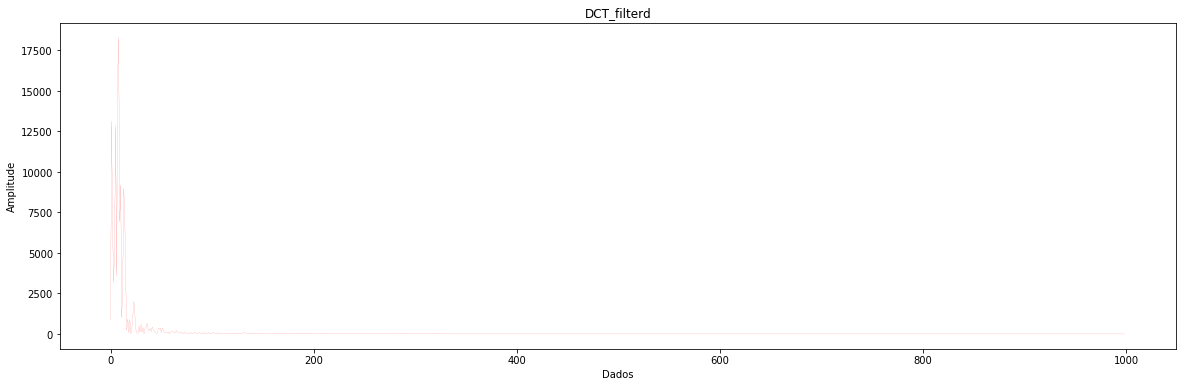

In [40]:
DCT_filtered = DCT.copy()

# Valores modulados
for i in range(len(DCT)):
    DCT_filtered[i] = abs(DCT[i])

DCT_abs = DCT_filtered.copy()
desenhaGrafico("DCT_filterd", DCT_filtered)

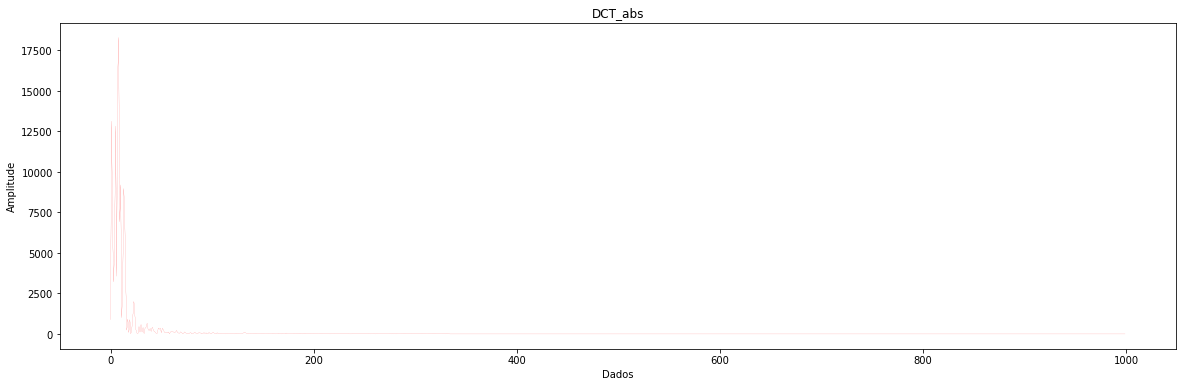

In [41]:
desenhaGrafico("DCT_abs", DCT_abs)

# Questão 2

2 Dada uma imagem I de dimensões RxC, desenvolva uma aplicação para:

a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

In [42]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)
print (imagem)

[[137 135 133 ... 145 147 114]
 [137 137 133 ... 144 148 114]
 [138 133 134 ... 133 125  87]
 ...
 [ 28  29  28 ...  53  61  59]
 [ 20  24  25 ...  64  70  65]
 [ 21  30  25 ...  71  67  72]]


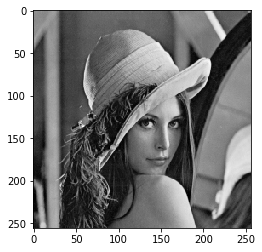

In [43]:
plt.imshow(imagem, cmap="gray")
plt.show()

## Implementando a DCT 2d

![Gráfico do processo de conversão](https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/Topic5.fig_117.gif)

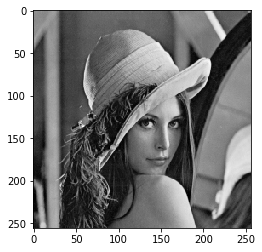

In [75]:
plt.imshow(imagem, cmap="gray")
plt.savefig("LenaOrig.png")

In [45]:
imgDCT = dct2d(imagem)

In [46]:
print("Valor DC: ", imgDCT[0][0])

Valor DC:  25261.12890625001


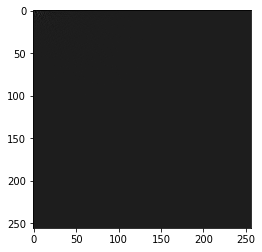

In [76]:
plt.imshow(imgDCT, cmap="gray")
plt.savefig("imgDCT.png")

In [48]:
imgDCT_semDC = imgDCT.copy()
imgDCT_semDC[0][0] = 0

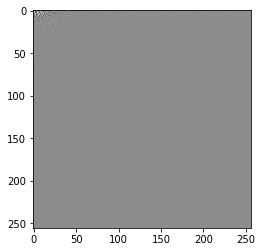

In [77]:
plt.imshow(imgDCT_semDC, cmap="gray")
plt.savefig("imgDCT_semDC.png")

In [50]:
imgIDCT = idct2d(imgDCT)

3

131  |  256 

199  |  

9

59

128  | 

9

141  |  256 

82

107 

183

98  |  

42

99

161  |  

167

182

142 

132

176  |  256

118  | 

158

167

157

224

20  |  

99

151

218

175

226  |  256

47 

99

72  |  256           

56

72

153

102

95  | 

8

166

122

47

245 

181  |  256           

154

1

148  |  256           

40

224

35  |  

66

195  | 

215  |  256           

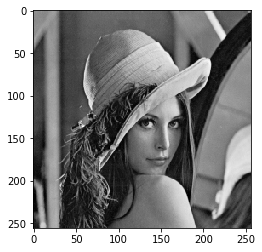

In [78]:
plt.imshow(imgIDCT, cmap="gray")
plt.savefig("imgIDCT.png")

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

### Passos do Algorítimo

1- Calcular a transformada DCT da imagem (RxC)

2- Criar uma matriz auxiliar de dimensão (RxC) que irá armazenar os índices seguindo uma ordem crescente de valores, ou seja, ordenando os pontos de acordo com seu valor na matriz

3- Criar um filtro binario que elimina os valores a partir de N, e realizar uma multiplicação da imagem pelo filtro binário.

In [53]:
LenaDCT = imgDCT

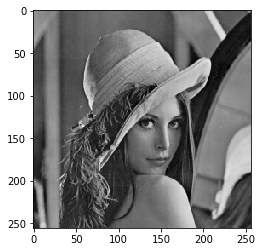

In [54]:
plt.imshow(fftpack.idctn(LenaDCT), cmap="gray")

In [57]:
auxMatrix = []
for i in range(len(LenaDCT)):
    for j in range(len(LenaDCT)):
        auxMatrix.append([i, j, LenaDCT[i][j]])

In [58]:
auxMatrix.sort(key=lambda x: abs(x[2]), reverse=True)

In [59]:
auxMatrix

[[0, 0, 25261.12890625001],
 [0, 1, -3292.1164216705815],
 [2, 5, 2706.743241630198],
 [0, 3, 2518.370423197],
 [3, 2, 2378.71645886354],
 [2, 3, 2281.1594878762317],
 [1, 2, -2109.9972986953308],
 [0, 4, 2102.49758199271],
 [0, 11, -2095.8562155795694],
 [3, 3, -1882.5754873373987],
 [1, 1, 1769.2678164341658],
 [3, 6, -1715.6687385231028],
 [0, 10, -1633.8118363537405],
 [2, 4, -1573.1568631797406],
 [1, 0, 1526.4301881254721],
 [4, 9, 1504.431921862757],
 [5, 7, 1458.7310234606641],
 [0, 12, -1412.955949597836],
 [2, 2, -1407.8819230546578],
 [5, 4, -1301.7842216954077],
 [5, 2, 1294.4591819352283],
 [1, 8, 1284.116092268106],
 [0, 5, -1165.975670690376],
 [6, 6, 1153.089817319527],
 [1, 10, 1125.1999526173945],
 [0, 7, 1092.8542615906274],
 [5, 8, -1092.6368445380233],
 [2, 1, 1089.9115605151478],
 [0, 9, -1069.6667145728438],
 [0, 14, -1047.2386441996046],
 [6, 7, -1027.2582290570278],
 [3, 5, 991.7694011002868],
 [5, 10, -989.9631544287989],
 [7, 0, 982.0258059730247],
 [5, 6, 95

In [60]:
listaComId = []
for index,value in enumerate(auxMatrix):
    listaComId.append([index,*value])

In [61]:
listaComId

[[0, 0, 0, 25261.12890625001],
 [1, 0, 1, -3292.1164216705815],
 [2, 2, 5, 2706.743241630198],
 [3, 0, 3, 2518.370423197],
 [4, 3, 2, 2378.71645886354],
 [5, 2, 3, 2281.1594878762317],
 [6, 1, 2, -2109.9972986953308],
 [7, 0, 4, 2102.49758199271],
 [8, 0, 11, -2095.8562155795694],
 [9, 3, 3, -1882.5754873373987],
 [10, 1, 1, 1769.2678164341658],
 [11, 3, 6, -1715.6687385231028],
 [12, 0, 10, -1633.8118363537405],
 [13, 2, 4, -1573.1568631797406],
 [14, 1, 0, 1526.4301881254721],
 [15, 4, 9, 1504.431921862757],
 [16, 5, 7, 1458.7310234606641],
 [17, 0, 12, -1412.955949597836],
 [18, 2, 2, -1407.8819230546578],
 [19, 5, 4, -1301.7842216954077],
 [20, 5, 2, 1294.4591819352283],
 [21, 1, 8, 1284.116092268106],
 [22, 0, 5, -1165.975670690376],
 [23, 6, 6, 1153.089817319527],
 [24, 1, 10, 1125.1999526173945],
 [25, 0, 7, 1092.8542615906274],
 [26, 5, 8, -1092.6368445380233],
 [27, 2, 1, 1089.9115605151478],
 [28, 0, 9, -1069.6667145728438],
 [29, 0, 14, -1047.2386441996046],
 [30, 6, 7, -102

In [63]:
OriginLenaDCT = np.zeros(LenaDCT.shape)
IndexMatrix = np.zeros(LenaDCT.shape)
for value in listaComId:

    index, i, j, a_value = value
    
    OriginLenaDCT[i][j] = a_value
    IndexMatrix[i][j] = index

In [64]:
LenaDCT == OriginLenaDCT

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [65]:
IndexMatrix

array([[0.0000e+00, 1.0000e+00, 1.0900e+02, ..., 2.0867e+04, 2.2001e+04,
        4.7268e+04],
       [1.4000e+01, 1.0000e+01, 6.0000e+00, ..., 2.6470e+04, 4.0217e+04,
        1.9697e+04],
       [3.4900e+02, 2.7000e+01, 1.8000e+01, ..., 4.2454e+04, 1.1618e+04,
        3.7300e+04],
       ...,
       [5.3177e+04, 6.4850e+04, 4.5757e+04, ..., 5.6059e+04, 6.4323e+04,
        4.3304e+04],
       [4.1128e+04, 6.0516e+04, 4.2352e+04, ..., 5.3877e+04, 4.3765e+04,
        4.7036e+04],
       [6.3451e+04, 3.3369e+04, 4.8964e+04, ..., 2.9095e+04, 4.4232e+04,
        2.1071e+04]])

In [66]:
IndexMatrixEdited = IndexMatrix.copy()

n coeficientes AC (da DCT) mais importantes de I e zerando os demais.

In [67]:
prompt = "Digite o tamanho de dados a ser tratado: MAX=" + str(LenaDCT.shape[1]**2) + " : " 
n = int(input(prompt))
if(n > (LenaDCT.shape[1])**2):
    print("Valor entrado é maior")
    n = (LenaDCT.shape[1])**2
print(n)

Digite o tamanho de dados a ser tratado: MAX=65536 : 30000
30000


In [68]:
IndexMatrixEdited[IndexMatrixEdited > n] = 0

In [69]:
IndexMatrixEdited

array([[0.0000e+00, 1.0000e+00, 1.0900e+02, ..., 2.0867e+04, 2.2001e+04,
        0.0000e+00],
       [1.4000e+01, 1.0000e+01, 6.0000e+00, ..., 2.6470e+04, 0.0000e+00,
        1.9697e+04],
       [3.4900e+02, 2.7000e+01, 1.8000e+01, ..., 0.0000e+00, 1.1618e+04,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.9095e+04, 0.0000e+00,
        2.1071e+04]])

In [70]:
IndexMatrixEdited[IndexMatrixEdited > 0] = 1

In [71]:
IndexMatrixEdited

array([[0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [72]:
LenaDCT_Transform = np.multiply(IndexMatrixEdited, LenaDCT)

37

192

213

239  | 

84

187 

1

49

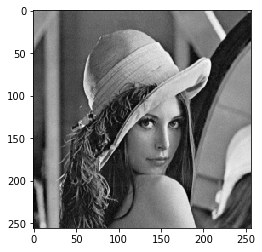

In [79]:
plt.imshow(idct2d(LenaDCT_Transform), cmap="gray")
name_fig = "LenaDCT_Transform"  + str(n)
plt.savefig(name_fig)